In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from pathlib import Path
csvpath = Path('../data/cleandata/Data.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col=0)
df.head()

,Crude1,WTI_Midland,Brent,RBOB,Ethanol,Corn,CAD_Heavy,VIX,ULSD,OPEC_Basket,RBOB_Crack,GC_ULSD_Crack,NY_ULSD_Crack,NG_HB,S_P,VLO
2017-01-05,53.76,-0.06,56.89,1.6377,1.507,361.25,-15.044,13.025,1.6942,53.02,21.45,14.58,17.13,3.273,2264.3,60.913052
2017-01-06,53.99,-0.11,57.10,1.6340,1.551,358.00,-14.459,12.875,1.7032,53.50,21.45,14.69,17.27,3.285,2271.5,59.995037
2017-01-09,51.96,-0.22,54.94,1.5707,1.524,360.00,-14.296,12.925,1.6376,52.85,20.94,14.27,16.68,3.103,2265.0,59.734032
2017-01-10,50.82,-0.17,53.64,1.5467,1.503,358.25,-14.193,12.875,1.6114,51.46,21.15,14.44,16.72,3.278,2263.7,59.878029
2017-01-11,52.25,-0.17,55.10,1.5929,1.492,357.25,-14.232,12.525,1.6524,50.98,21.64,14.67,16.96,3.224,2270.6,60.373043


In [6]:
df.index.name = 'Date'

In [9]:
df.reset_index(inplace=True)

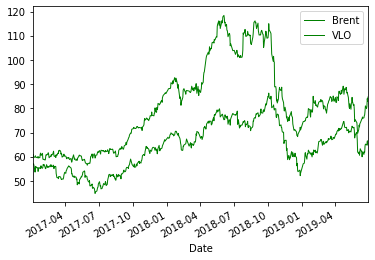

In [11]:
df[['Date','Brent','VLO']].set_index('Date').plot(color="green", linewidth=1.0)


In [12]:
df['VLO_Return'] = df['VLO'].pct_change() * 100
df['Brent_Return'] = df['Brent'].pct_change() * 100
df['Lagged_Brent_Return'] = df.Brent_Return.shift()
df = df.dropna()
df.head() 

,Date,Crude1,WTI_Midland,Brent,RBOB,Ethanol,Corn,CAD_Heavy,VIX,ULSD,OPEC_Basket,RBOB_Crack,GC_ULSD_Crack,NY_ULSD_Crack,NG_HB,S_P,VLO,VLO_Return,Brent_Return,Lagged_Brent_Return
2,2017-01-09,51.96,-0.22,54.94,1.5707,1.524,360.00,-14.296,12.925,1.6376,52.85,20.94,14.27,16.68,3.103,2265.0,59.734032,-0.435044,-3.782837,0.369133
3,2017-01-10,50.82,-0.17,53.64,1.5467,1.503,358.25,-14.193,12.875,1.6114,51.46,21.15,14.44,16.72,3.278,2263.7,59.878029,0.241064,-2.366218,-3.782837
4,2017-01-11,52.25,-0.17,55.10,1.5929,1.492,357.25,-14.232,12.525,1.6524,50.98,21.64,14.67,16.96,3.224,2270.6,60.373043,0.826704,2.721849,-2.366218
5,2017-01-12,53.01,-0.22,56.01,1.6108,1.475,358.25,-14.234,12.475,1.6756,52.30,21.59,14.63,17.08,3.386,2263.4,59.869034,-0.834825,1.651543,2.721849
6,2017-01-13,52.37,-0.27,55.45,1.6117,1.476,358.50,-14.203,12.175,1.6514,52.64,22.24,14.42,16.88,3.419,2272.5,59.752033,-0.195428,-0.999821,1.651543


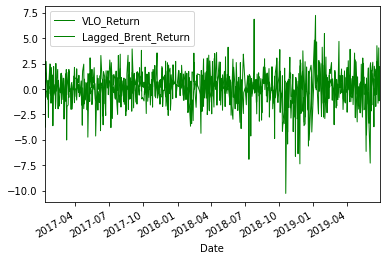

In [14]:
df[['Date','VLO_Return','Lagged_Brent_Return']].set_index('Date').plot(color="green", linewidth=1.0)


In [19]:
df = df.set_index(pd.DatetimeIndex(df['Date']))

In [20]:
 # Create a train/test split for the data using 2001-2018 for training and 2019 for testing
train = df['2017':'2018']
test = df['2019']

In [21]:
 # Create train and test sets for dependent and independent variables
X_train = train["Lagged_Brent_Return"].to_frame()
y_train = train["VLO_Return"]
X_test = test["Lagged_Brent_Return"].to_frame()
y_test = test["VLO_Return"]

In [22]:
# Create and fit model to the data, make predictions
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [23]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BA7DBF708>,
      dtype=object)

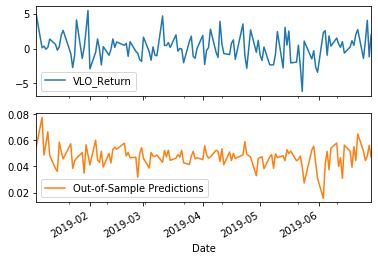

In [24]:
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [26]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["VLO_Return"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 1.8800254582023088


In [27]:
 # Split the index into weekly periods
weeks = df.index.to_period("w").unique()
print(weeks[0])

2017-01-09/2017-01-15


In [29]:
# Declare the training window of 12 weeks
# Define the timeframe of rolling windows
training_window = 5
timeframe = len(weeks) - training_window - 1
print(timeframe)

123


In [30]:
# Construct empty placeholder dataframes.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

In [32]:
# During rolling iteration, split into train and test sets.
# Use linear regression to make out-of-sample predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window+i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window + i + 1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df.loc[start_of_training_period:end_of_training_period]
    test = df.loc[start_of_test_week:end_of_test_week]
    
    # Create new dataframes:
    X_train = train["Lagged_Brent_Return"].to_frame()
    y_train = train["VLO_Return"]
    X_test = test["Lagged_Brent_Return"].to_frame()
    y_test = test["VLO_Return"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals) 

In [33]:
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

,Actual Returns,Out-of-Sample Predictions
2017-02-21,1.191024,-0.050867
2017-02-22,-0.392322,-0.166906
2017-02-23,1.545219,0.112059
2017-02-24,-0.462467,-0.148328
2017-02-27,0.779354,0.159754


In [34]:
 # 2019 Data
results_2019 = Results.loc['2019':]
results_2019

,Actual Returns,Out-of-Sample Predictions
2019-01-04,4.804015,-1.056070
2019-01-07,0.103879,-0.623282
2019-01-08,0.350245,-0.077840
2019-01-09,-0.090485,-0.235237
2019-01-10,0.168197,-0.413299
...,...,...
2019-06-24,-1.403981,-0.024592
2019-06-25,1.077264,-0.012754
2019-06-26,4.042628,-0.018475
2019-06-27,-1.177435,-0.031968


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BA7ED4408>,
      dtype=object)

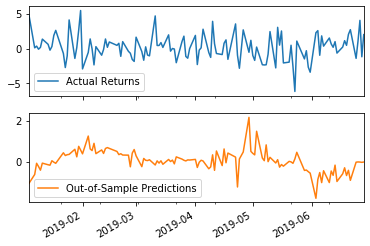

In [35]:
 # Plot the results
results_2019.plot(subplots=True)

In [36]:
# Out-of-sample metrics
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    results_2019["Actual Returns"],
    results_2019["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rolling_rmse = np.sqrt(mse)
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

Rolling Out-of-Sample Root Mean Squared Error (RMSE): 2.007934374154795


In [37]:
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 1.8800254582023088
Rolling Out-of-Sample Root Mean Squared Error (RMSE): 2.007934374154795
